<a href="https://colab.research.google.com/github/andrniko/Machine-Learning/blob/master/Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Support Vector Machine creates a hyperplane which sepparates the groups within a dataset. We call the plane the decision boundary. It classifies new data points by projecting a new vector to the decision boundary and looks on which "side" of the hyperplane it is. The unkonws are a feature set.


The most basic formula here is

u*w+b

w is the vector which goes from the start point and is perpendicular to the hyperplane.

u is the vector of the new feature

b is the bias.


Depending on the result we can deduce where the new feature belongs.

x_-sv*b+b=-1(It belongs on the "other side"(+) of the hyperplane and thus to the other group)


x_sv*2+b=1 (It belongs on "our"(-) side of the hyperplane and thus belongs to the first group)



y_i is the class of the features which we are passing trough

if y_i belongs on the (+) it's goung to be 1

it y_i belongs on (-) side, it's going to be a -1


(+) Class
  x_i*w+b=1

(-) Class
  x_i*w+b=-1

If we were to multiply both sides by y_i, we get:


For the (+) class: 
y_i*(x_i+b)=1*1
->y_i*(x_i+b)-1=0


For the (-) classs:
y_i*(x_i*w+b)=-1*-1
->y_i*(x_i*w+b)-1=0

More math in OneNote









In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

In [3]:
data_dict={-1:np.array([[1,7],[2,8],[3,8]]),
           1:np.array([[5,1],[6,-1],[7,3]])}

In [4]:
#We are defining our SVM as an object, so we can save it and apply it 

class Support_Vector_Machine:
  def __init__(self,visualization=True): 
    pass

  #training
  def fit(self,data):
    pass

  #predicting
  def predict(self,featyres):
    pass

In [5]:
#Initializing

def __init__(self,visualization=True):
    self.visualization=visualization
    self.colors={1:'r',-1:'b'}
    if self.visualization:
      self.fig=plt.figure()
      self.ax=self.fig.add_subplot(1,1,1)




In [6]:
 #Training

 def fit(self,data):

    self.data=data
    #{||W||:[w,b]}
    opt_dict={}

    #For each step we need to apply these transfoms to check for optimal values
    transforms=[[1,1],
                [-1,1],
                [-1,-1],
                [1,-1]]

    #Saving our data in a list:

    all_data=[]
    for i in self.data:
      for featureset in self.data[yi]:
        for feature in featureset:
          all_data.append(feature)

    self.max_feature_value=max(all_data)
    self.min_feature_value=min(all_data)
    all_data=None

    #Support vectors yi(xi.w+b)=1
    #When in both positive and negative classes we have a value arbitratily close to 1, we have hit gold

    step_sizes=[self.max_feature_value*0.1,
                self.max_feature_value*0.01,
                #point of expense:
                self.max_feature_value*0.001]


    #Extremely expensive
    b_range_multiple=5

    #No need to take as small steps with b as with w
    b_multiple=5
    
    #Optimizing
    latest_optimum=self.max_feature_value*10

    for step in step_sizes:
      w=np.array([latest_optimum,latest_optimum])
      #We can do this for the problem is of conex nature
      optimized=False

      while not optimized:
        for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                           (self.max_feature_value*b_range_multiple),
                           step*b_multiple):
          for transformation in transforms:
            w_t=w*transformation
            found_option=True
            #weakest link in SVM fundamentally
            #SMO attempts to fix this a bit
            #y_i*(x_i*w+b)>=1
            
            for  i in self.data:
              for xi in self.data[i]:
                yi=i
                if not yi*(np.dot(w_t,xi)+b)>=1:
                  #Although set as true, if one member of data is not in the list
                  #the whole thing is false
                  found_option=False
                  
            if found_option:
              opt_dict[np.linalg.norm(w_t)]=[w_t,b]

        if w[0]<0:
          optimized=True
          print('Optimized a step.')
        else:
          #w=[5,5] for now
          #step = 1
          w=w-step
          #w=[4,4] now
      
      norms=sorted([n for n in opt_dict])

      opt_choice=norms[0] #smallest norm
      self.w=opt_choice[0] #||w||:[w,b]
      self.b=opt_choice[1]
      latest_optimum=opt_choice[0][0]+step*2




In [7]:
  #Predicting

  def predict(self,featyres):
    #Predicting the sign of x.w+b
    classification=np.sign(np.dot(np.array(features),self.w)+b)
    if classification!=0 and self.visualization:
      self.ax.scatter(features[0],features[1],s=200,marker='*',color=self.colors[classification])
  
    return classification

In [8]:
def visualize(self):
  [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
  

  #Visualization is only for our eyes, the program doesnt care about it
  #hyperplane=x.w+b
  def hyperplane(x,w,b,v):
    #v=x.w+b
    #psv=1
    #nsv=-1
    #dec=0
    #We want to stipulate what v is
    return (-w[0]*x-b+v)/w[1]

  datarang=(self.min_feature_value*0.9,self.max_feature_value*1.1)
  hyp_x_min=datarange[0]
  hyp_x_max=datarange[1]
  #positive support vector
  # (w.x+b)=1
  psv1=hyerplane(hyp_x_min,self.w,self.b,1) #scalar value ; y for a given x
  psv2=hyperplane(hyp_x_max,self.w,self.b,1)

  self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2])


  #negative support vector
  # (w.x+b)=-1
  nsv1=hyerplane(hyp_x_min,self.w,self.b,-1) 
  nsv2=hyperplane(hyp_x_max,self.w,self.b,-1)
  self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2])

  #decision boundary vector
  # (w.x+b)=-1
  dbv1=hyerplane(hyp_x_min,self.w,self.b,0) 
  db2=hyperplane(hyp_x_max,self.w,self.b,0)
  self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2])


  plt.show()





In [9]:
class Support_Vector_Machine:
    # calling the constructor
    def __init__(self, visualization = True):
        self.visualization = visualization
        # for visualizing plots
        self.colors = {1:'r', -1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)

    # training method
    def fit(self, data):
        self.data = data
        optimum_dict = {}

        transformations = [[1, 1],
                          [1, -1],
                          [-1, -1],
                          [-1, 1]]

        # finding the maximum and minimum feature in dataset
        all_data = []
        for group in self.data:
            for featureset in self.data[group]:
                for feature in featureset:
                    all_data.append(feature)
        
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # declaring the step size for convergence
        step_size = [self.max_feature_value * 0.1,
                     self.max_feature_value * 0.01,
                     #point of expense:
                     self.max_feature_value * 0.001
                     ]

        b_range_multiple = 5
        b_multiple = 5
        latest_optimum = self.max_feature_value * 10

        # stepping towards the optimim value
        for step in step_size:
            w = np.array([latest_optimum, latest_optimum])
            optimized = False

            # running until it is optimized
            while not optimized:
                # checking for every possible b from negative to positive max feature value * b range multiplier with step of step * b_multiples
                for b in np.arange(-1*self.max_feature_value*b_range_multiple,
                                    self.max_feature_value*b_range_multiple,
                                    step*b_multiple):
                    # checking for every possible transformation of w
                    for transformation in transformations:
                        w_t = w*transformation
                        found_option = True

                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t, xi)+b) >= 1:
                                    found_option = False
                                    #print(xi,':',yi*(np.dot(w_t,xi)+b)
                                 
                        if found_option:
                            optimum_dict[np.linalg.norm(w_t)] = [w_t, b]
            
                if w[0] < 0:
                    optimized = True
                    print('Optimized a step')
                else:
                    w = w - step
            
            norms = sorted([n for n in optimum_dict])
            optimum_choice = optimum_dict[norms[0]]
            self.w = optimum_choice[0]
            self.b = optimum_choice[1]
            latest_optimum = optimum_choice[0][0] + step * 2

        for i in self.data:
          for xi in self.data[i]:
              yi=i
              print(xi,':',yi*(np.dot(self.w,xi)+self.b))
              #We use this to check the optimization. 
              #We need to have a value in both classes which is close to 1
              #If not -> tweak b_range_multiple,step_size

    # for predicting a value
    def predict(self, features):
        classification = np.sign(np.dot(np.array(features), self.w)+self.b)
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        return classification
    
    # visualizing data
    def visualize(self):
        [[self.ax.scatter(x[0], x[1], c=self.colors[i]) for x in self.data[i]] for i in self.data]
        
        def hyperplane(x, w, b, v):
            return (-w[0]*x-b+v) / w[1]

        hyp_x_min = self.min_feature_value * 0.9
        hyp_x_max = self.max_feature_value * 1.1

        # plotting positive support vector
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2], 'k')

        # plotting negative support vector
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2], 'k')

        # plotting positive support vector
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min, hyp_x_max], [db1, db2], 'y--')

        plt.show()

        
#Defining our dataset
data_dict={-1:np.array([[1,7],[2,8],[3,8]]),
           1:np.array([[5,1],[6,-1],[7,3]])}



Optimized a step
Optimized a step
Optimized a step
[1 7] : 1.2239999999999465
[2 8] : 1.2239999999999465
[3 8] : 1.000000000000098
[5 1] : 1.015999999998539
[ 6 -1] : 1.6879999999980846
[7 3] : 1.015999999998539


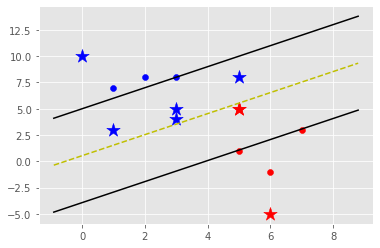

In [10]:
#Making and training the model

svm=Support_Vector_Machine()

svm.fit(data=data_dict)

#Trying on new data and visualizing

predict_us=[[0,10],[1,3],[3,4],[3,5],[5,5],[5,5],[6,-5],[5,8]]

for p in predict_us:
  svm.predict(p)

  
svm.visualize()

In [11]:
#The model can predict really fast
svm.predict([5,2])

1.0

In [12]:
#Kernel Introduction OneNote

     pcost       dcost       gap    pres   dres
 0:  1.4102e+05 -1.1471e+08  3e+08  7e-01  8e-12
 1:  4.3471e+05 -2.8813e+07  4e+07  7e-02  3e-11
 2:  3.5265e+05 -4.4872e+06  6e+06  7e-03  6e-12
 3:  2.5470e+04 -5.8616e+05  6e+05  2e-04  3e-12
 4: -7.7250e+03 -1.0730e+05  1e+05  3e-05  3e-12
 5: -9.8820e+03 -5.1448e+04  4e+04  2e-06  3e-12
 6: -1.0498e+04 -2.8672e+04  2e+04  8e-07  2e-12
 7: -1.1520e+04 -2.8700e+04  2e+04  7e-07  3e-12
 8: -1.1602e+04 -2.1088e+04  9e+03  4e-08  3e-12
 9: -1.2532e+04 -2.0170e+04  8e+03  2e-08  4e-12
10: -1.3449e+04 -1.7997e+04  5e+03  7e-10  4e-12
11: -1.4136e+04 -1.6540e+04  2e+03  3e-10  4e-12
12: -1.4691e+04 -1.5562e+04  9e+02  8e-11  4e-12
13: -1.4960e+04 -1.5110e+04  2e+02  9e-12  5e-12
14: -1.5023e+04 -1.5025e+04  2e+00  9e-13  5e-12
15: -1.5024e+04 -1.5024e+04  2e-02  9e-13  5e-12
16: -1.5024e+04 -1.5024e+04  2e-04  2e-12  6e-12
Optimal solution found.
17 support vectors out of 180 points
20 out of 20 predictions correct


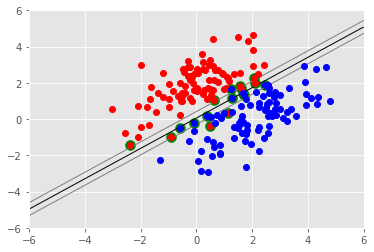

In [28]:
#Example of SVM with different kernels( lineaer, nonlinear and soft margine)

import numpy as np
from numpy import linalg
import cvxopt
import cvxopt.solvers
             
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, p=3):
    return (1 + np.dot(x, y)) ** p

def gaussian_kernel(x, y, sigma=5.0):
    return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

class SVM(object):

    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Gram matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])

        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1,n_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        print("%d support vectors out of %d points" % (len(self.a), n_samples))

        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n],sv])
        self.b /= len(self.a)

        # Weight vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None

    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s
            return y_predict + self.b

    def predict(self, X):
        return np.sign(self.project(X))

if __name__ == "__main__":
    import pylab as pl

    def gen_lin_separable_data():
        # generate training data in the 2-d case
        mean1 = np.array([0, 2])
        mean2 = np.array([2, 0])
        cov = np.array([[0.8, 0.6], [0.6, 0.8]])
        X1 = np.random.multivariate_normal(mean1, cov, 100)
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 100)
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def gen_non_lin_separable_data():
        mean1 = [-1, 2]
        mean2 = [1, -1]
        mean3 = [4, -4]
        mean4 = [-4, 4]
        cov = [[1.0,0.8], [0.8, 1.0]]
        X1 = np.random.multivariate_normal(mean1, cov, 50)
        X1 = np.vstack((X1, np.random.multivariate_normal(mean3, cov, 50)))
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 50)
        X2 = np.vstack((X2, np.random.multivariate_normal(mean4, cov, 50)))
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def gen_lin_separable_overlap_data():
        # generate training data in the 2-d case
        mean1 = np.array([0, 2])
        mean2 = np.array([2, 0])
        cov = np.array([[1.5, 1.0], [1.0, 1.5]])
        X1 = np.random.multivariate_normal(mean1, cov, 100)
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 100)
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def split_train(X1, y1, X2, y2):
        X1_train = X1[:90]
        y1_train = y1[:90]
        X2_train = X2[:90]
        y2_train = y2[:90]
        X_train = np.vstack((X1_train, X2_train))
        y_train = np.hstack((y1_train, y2_train))
        return X_train, y_train

    def split_test(X1, y1, X2, y2):
        X1_test = X1[90:]
        y1_test = y1[90:]
        X2_test = X2[90:]
        y2_test = y2[90:]
        X_test = np.vstack((X1_test, X2_test))
        y_test = np.hstack((y1_test, y2_test))
        return X_test, y_test

    def plot_margin(X1_train, X2_train, clf):
        def f(x, w, b, c=0):
            # given x, return y such that [x,y] in on the line
            # w.x + b = c
            return (-w[0] * x - b + c) / w[1]

        pl.plot(X1_train[:,0], X1_train[:,1], "ro")
        pl.plot(X2_train[:,0], X2_train[:,1], "bo")
        pl.scatter(clf.sv[:,0], clf.sv[:,1], s=100, c="g")

        # w.x + b = 0
        a0 = -4; a1 = f(a0, clf.w, clf.b)
        b0 = 4; b1 = f(b0, clf.w, clf.b)
        pl.plot([a0,b0], [a1,b1], "k")

        # w.x + b = 1
        a0 = -4; a1 = f(a0, clf.w, clf.b, 1)
        b0 = 4; b1 = f(b0, clf.w, clf.b, 1)
        pl.plot([a0,b0], [a1,b1], "k--")

        # w.x + b = -1
        a0 = -4; a1 = f(a0, clf.w, clf.b, -1)
        b0 = 4; b1 = f(b0, clf.w, clf.b, -1)
        pl.plot([a0,b0], [a1,b1], "k--")

        pl.axis("tight")
        pl.show()

    def plot_contour(X1_train, X2_train, clf):
        pl.plot(X1_train[:,0], X1_train[:,1], "ro")
        pl.plot(X2_train[:,0], X2_train[:,1], "bo")
        pl.scatter(clf.sv[:,0], clf.sv[:,1], s=100, c="g")

        X1, X2 = np.meshgrid(np.linspace(-6,6,50), np.linspace(-6,6,50))
        X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
        Z = clf.project(X).reshape(X1.shape)
        pl.contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')
        pl.contour(X1, X2, Z + 1, [0.0], colors='grey', linewidths=1, origin='lower')
        pl.contour(X1, X2, Z - 1, [0.0], colors='grey', linewidths=1, origin='lower')

        pl.axis("tight")
        pl.show()

    def test_linear():
        X1, y1, X2, y2 = gen_lin_separable_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM()
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_margin(X_train[y_train==1], X_train[y_train==-1], clf)

    def test_non_linear():
        X1, y1, X2, y2 = gen_non_lin_separable_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM(polynomial_kernel)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)

    def test_soft():
        X1, y1, X2, y2 = gen_lin_separable_overlap_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM(C=1000.1)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)

        
    #test_linear()
    #test_non_linear()
    test_soft()